In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def plot_accuracy_and_loss(csv1_path, csv2_path, csv3_path, csv4_path,
                           label1='Dataset 1', label2='Dataset 2', label3='Dataset 3', label4='Dataset 4'):
    # Load CSV files
    df1 = pd.read_csv(csv1_path)
    df2 = pd.read_csv(csv2_path)
    df3 = pd.read_csv(csv3_path)
    df4 = pd.read_csv(csv4_path)

    # Normalize column names
    for df in [df1, df2, df3, df4]:
        df.columns = df.columns.str.lower()

    # Function to compute mean and std for accuracy and loss
    def compute_stats(df, divide_accuracy=False):
        stats = df.groupby('train_size')[['accuracy', 'loss']].agg(['mean', 'std']).reset_index()
        # Flatten MultiIndex columns
        stats.columns = ['train_size', 'acc_mean', 'acc_std', 'loss_mean', 'loss_std']
        if divide_accuracy:
            stats['acc_mean'] /= 100
            stats['acc_std'] /= 100
        return stats

    # Compute stats for each dataset
    df1_stats = compute_stats(df1)
    df2_stats = compute_stats(df2)
    df3_stats = compute_stats(df3)
    df4_stats = compute_stats(df4, divide_accuracy=True)
    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    # --- Accuracy plot ---
    ax = axes[0]
    ax.plot(df1_stats['train_size'], df1_stats['acc_mean'], label=label1)
    ax.fill_between(df1_stats['train_size'], df1_stats['acc_mean'] - df1_stats['acc_std'],
                    df1_stats['acc_mean'] + df1_stats['acc_std'], alpha=0.2)

    ax.plot(df2_stats['train_size'], df2_stats['acc_mean'], label=label2)
    ax.fill_between(df2_stats['train_size'], df2_stats['acc_mean'] - df2_stats['acc_std'],
                    df2_stats['acc_mean'] + df2_stats['acc_std'], alpha=0.2)

    ax.plot(df3_stats['train_size'], df3_stats['acc_mean'], label=label3)
    ax.fill_between(df3_stats['train_size'], df3_stats['acc_mean'] - df3_stats['acc_std'],
                    df3_stats['acc_mean'] + df3_stats['acc_std'], alpha=0.2)

    ax.plot(df4_stats['train_size'], df4_stats['acc_mean'], label=label4)
    ax.fill_between(df4_stats['train_size'], df4_stats['acc_mean'] - df4_stats['acc_std'],
                    df4_stats['acc_mean'] + df4_stats['acc_std'], alpha=0.2)

    ax.set_title('Average Accuracy vs Set Size')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Set Size')
    ax.legend()
    ax.grid(True)

    # --- Loss plot ---
    ax = axes[1]
    ax.plot(df1_stats['train_size'], df1_stats['loss_mean'], label=label1)
    ax.fill_between(df1_stats['train_size'], df1_stats['loss_mean'] - df1_stats['loss_std'],
                    df1_stats['loss_mean'] + df1_stats['loss_std'], alpha=0.2)

    ax.plot(df2_stats['train_size'], df2_stats['loss_mean'], label=label2)
    ax.fill_between(df2_stats['train_size'], df2_stats['loss_mean'] - df2_stats['loss_std'],
                    df2_stats['loss_mean'] + df2_stats['loss_std'], alpha=0.2)

    ax.plot(df3_stats['train_size'], df3_stats['loss_mean'], label=label3)
    ax.fill_between(df3_stats['train_size'], df3_stats['loss_mean'] - df3_stats['loss_std'],
                    df3_stats['loss_mean'] + df3_stats['loss_std'], alpha=0.2)

    ax.plot(df4_stats['train_size'], df4_stats['loss_mean'], label=label4)
    ax.fill_between(df4_stats['train_size'], df4_stats['loss_mean'] - df4_stats['loss_std'],
                    df4_stats['loss_mean'] + df4_stats['loss_std'], alpha=0.2)

    ax.set_title('Average Loss vs Set Size')
    ax.set_xlabel('Set Size')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    
    plt.show()

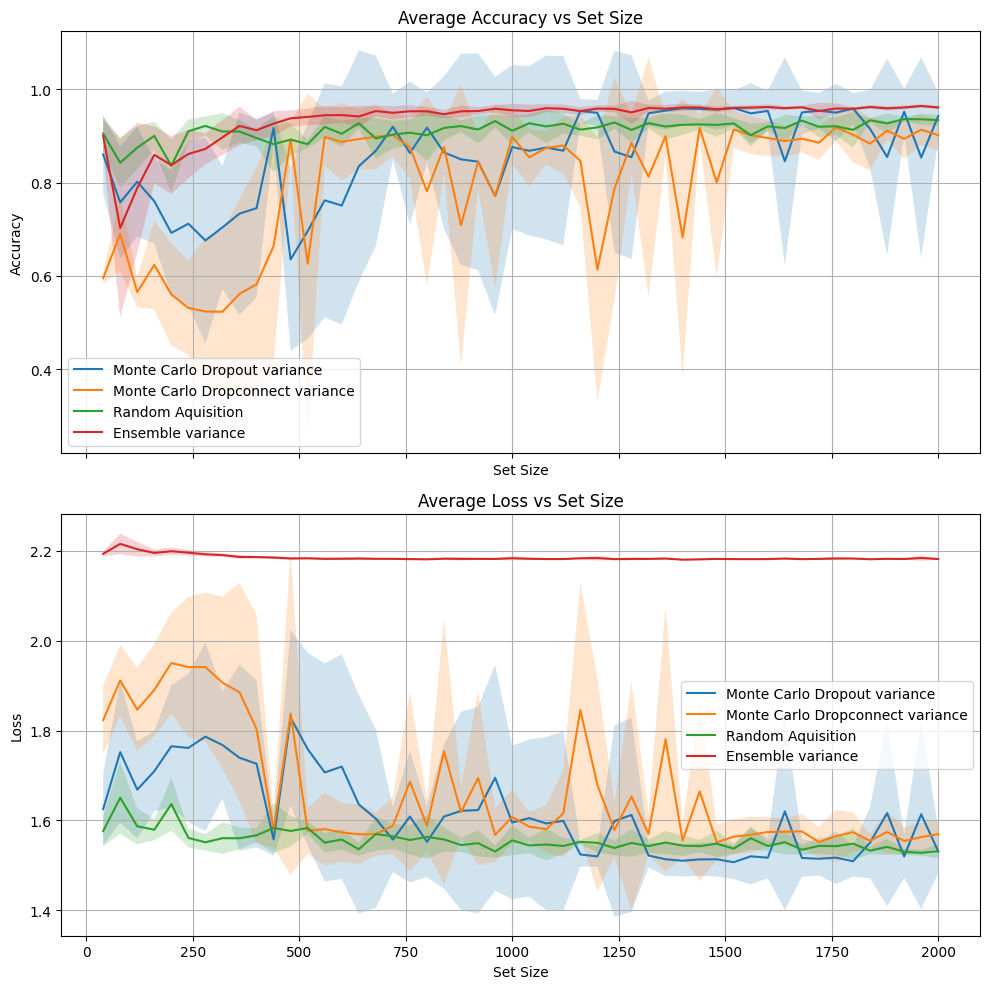

In [3]:

plot_accuracy_and_loss("../data/model_data/dataMCD_new_variance.csv", "../data/model_data/dataMCConnect_new_variance.csv", "../data/model_data/dataRAND.csv", "../data/model_data/dataENS_variance.csv",
                           label1='Monte Carlo Dropout variance', label2='Monte Carlo Dropconnect variance', label3='Random Aquisition', label4='Ensemble variance')

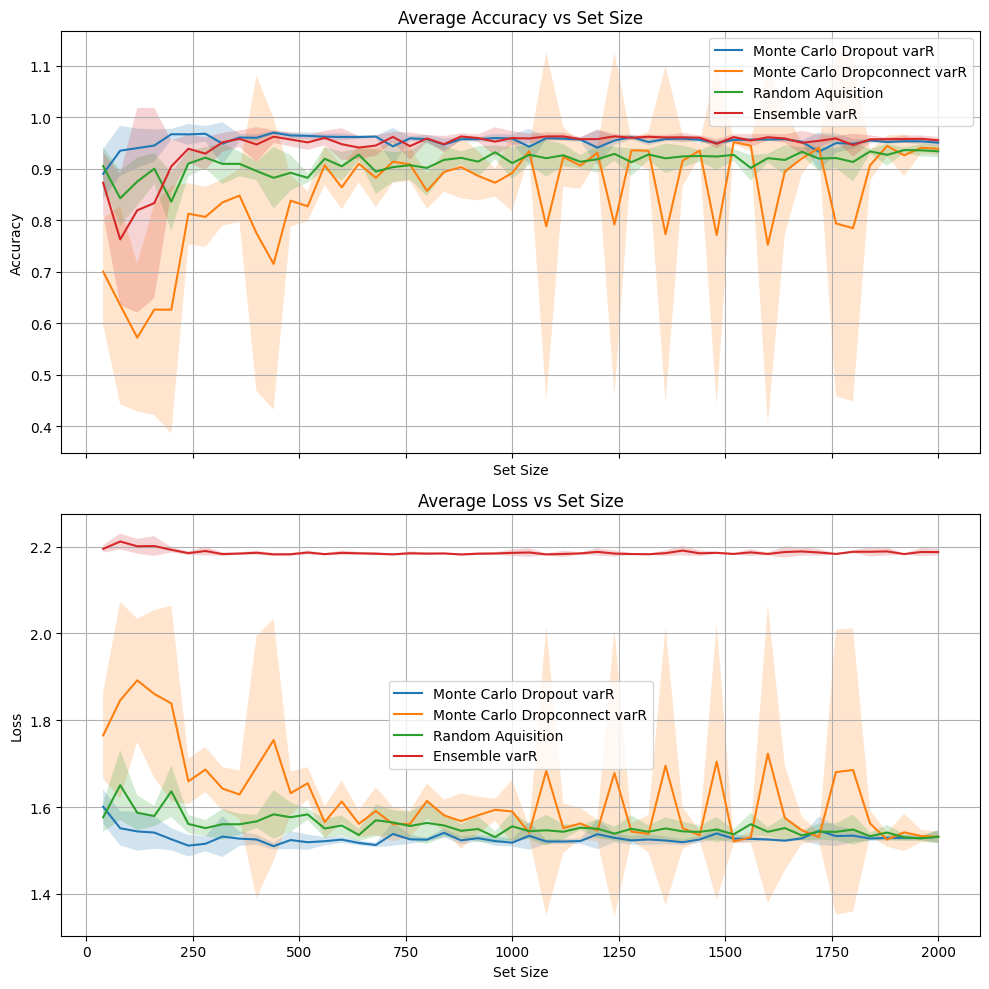

In [4]:

plot_accuracy_and_loss("../data/model_data/dataMCD_new_varR.csv", "../data/model_data/dataMCConnect_new_varR.csv", "../data/model_data/dataRAND.csv", "../data/model_data/dataENS_varR.csv",
                           label1='Monte Carlo Dropout varR', label2='Monte Carlo Dropconnect varR', label3='Random Aquisition', label4='Ensemble varR')